Loading required package: data.table
Loading required package: ggplot2
Loading required package: ggsci


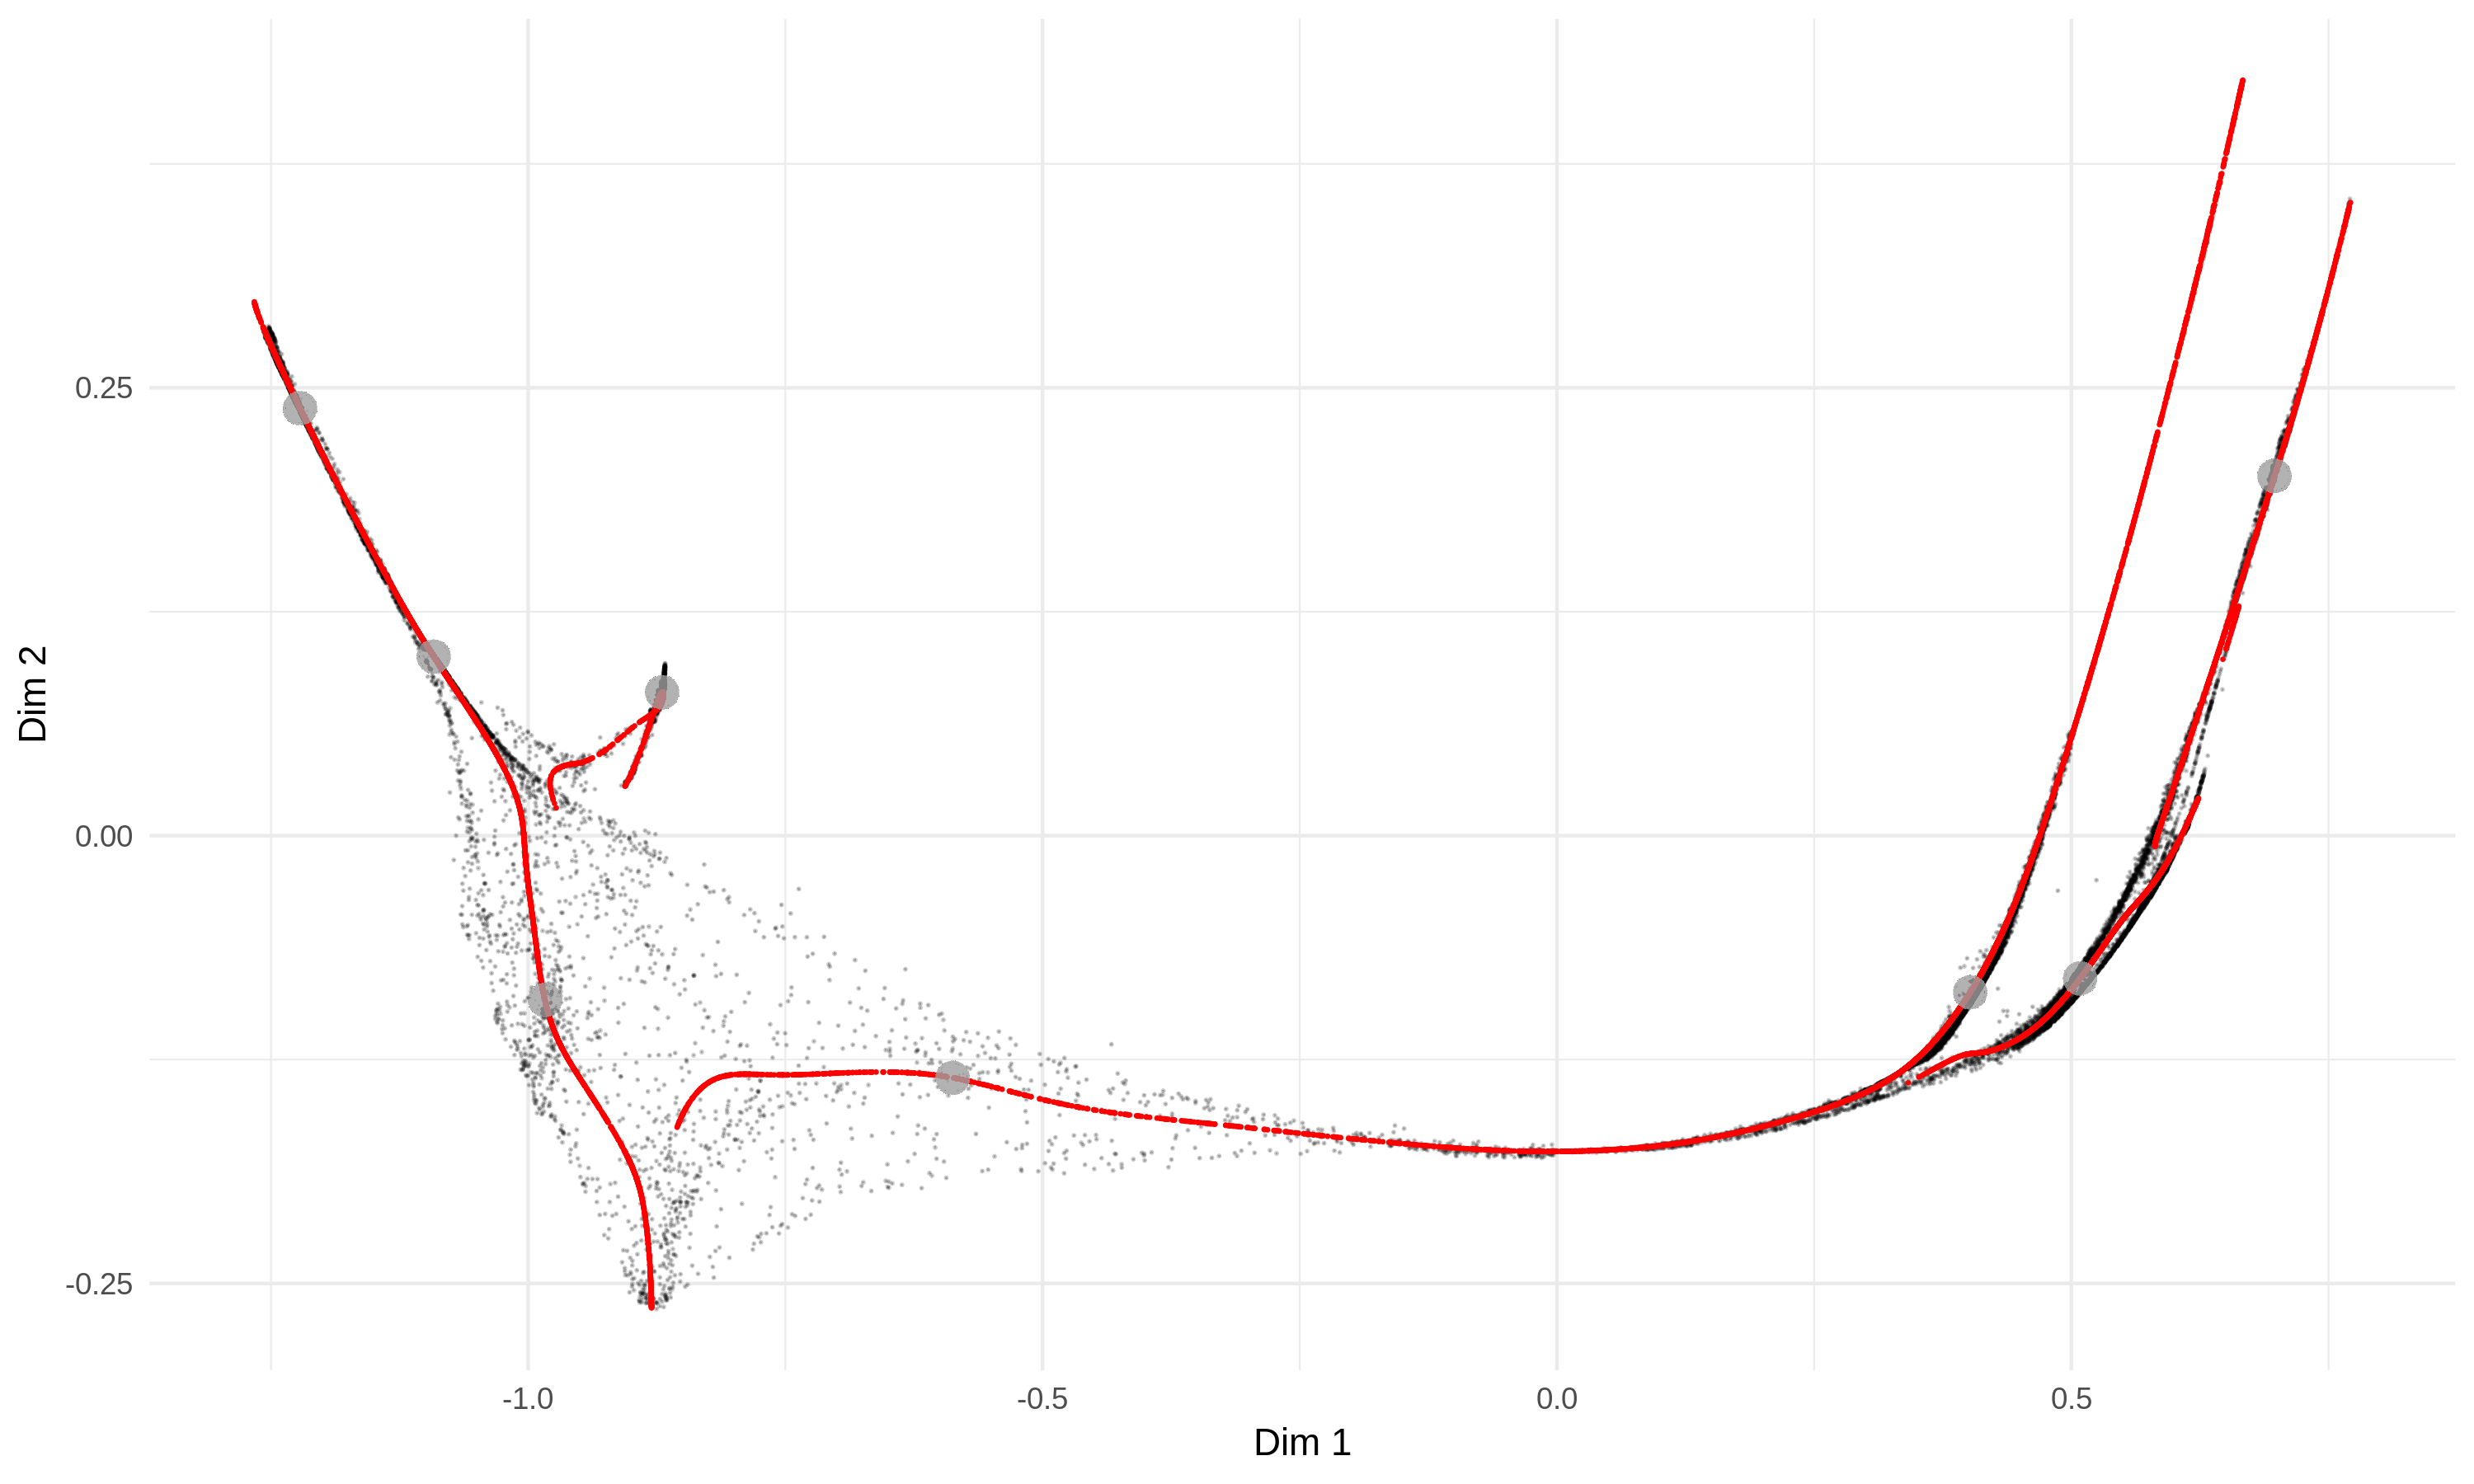

In [1]:
require(data.table)
require(ggplot2)
require(ggsci)
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)

t0 = fread('./figures/trajectory.hippocampus.d0.bw0.08.csv',header=T)
t1 = fread('./figures/trajectory.hippocampus.d1.bw0.08.csv',header=T)
t2 = fread('./figures/trajectory.hippocampus.d2.bw0.08.csv',header=T)
t = fread('./figures/trajectory.hippocampus.d12.csv',header=T)

#Plot 0-, 1-, and 2- dimensional density ridges
ggplot()+geom_point(aes(x=-t2$`0`, y=t2$`1`),size=I(0.01),alpha=I(0.2),color=I('black'))+geom_point(aes(x=-t1$`0`, y=t1$`1`),size=I(0.1),alpha=I(0.99),color=I('red'))+theme_minimal()+xlab('Dim 1')+ylab('Dim 2')+scale_color_npg()+geom_point(aes(x=-t0$`0`, y=t0$`1`),size=I(4),alpha=I(0.02),color=I('gray60'))
ggsave('./figures/trajectory.hippocampus.three.pdf',width = 10,height = 6)



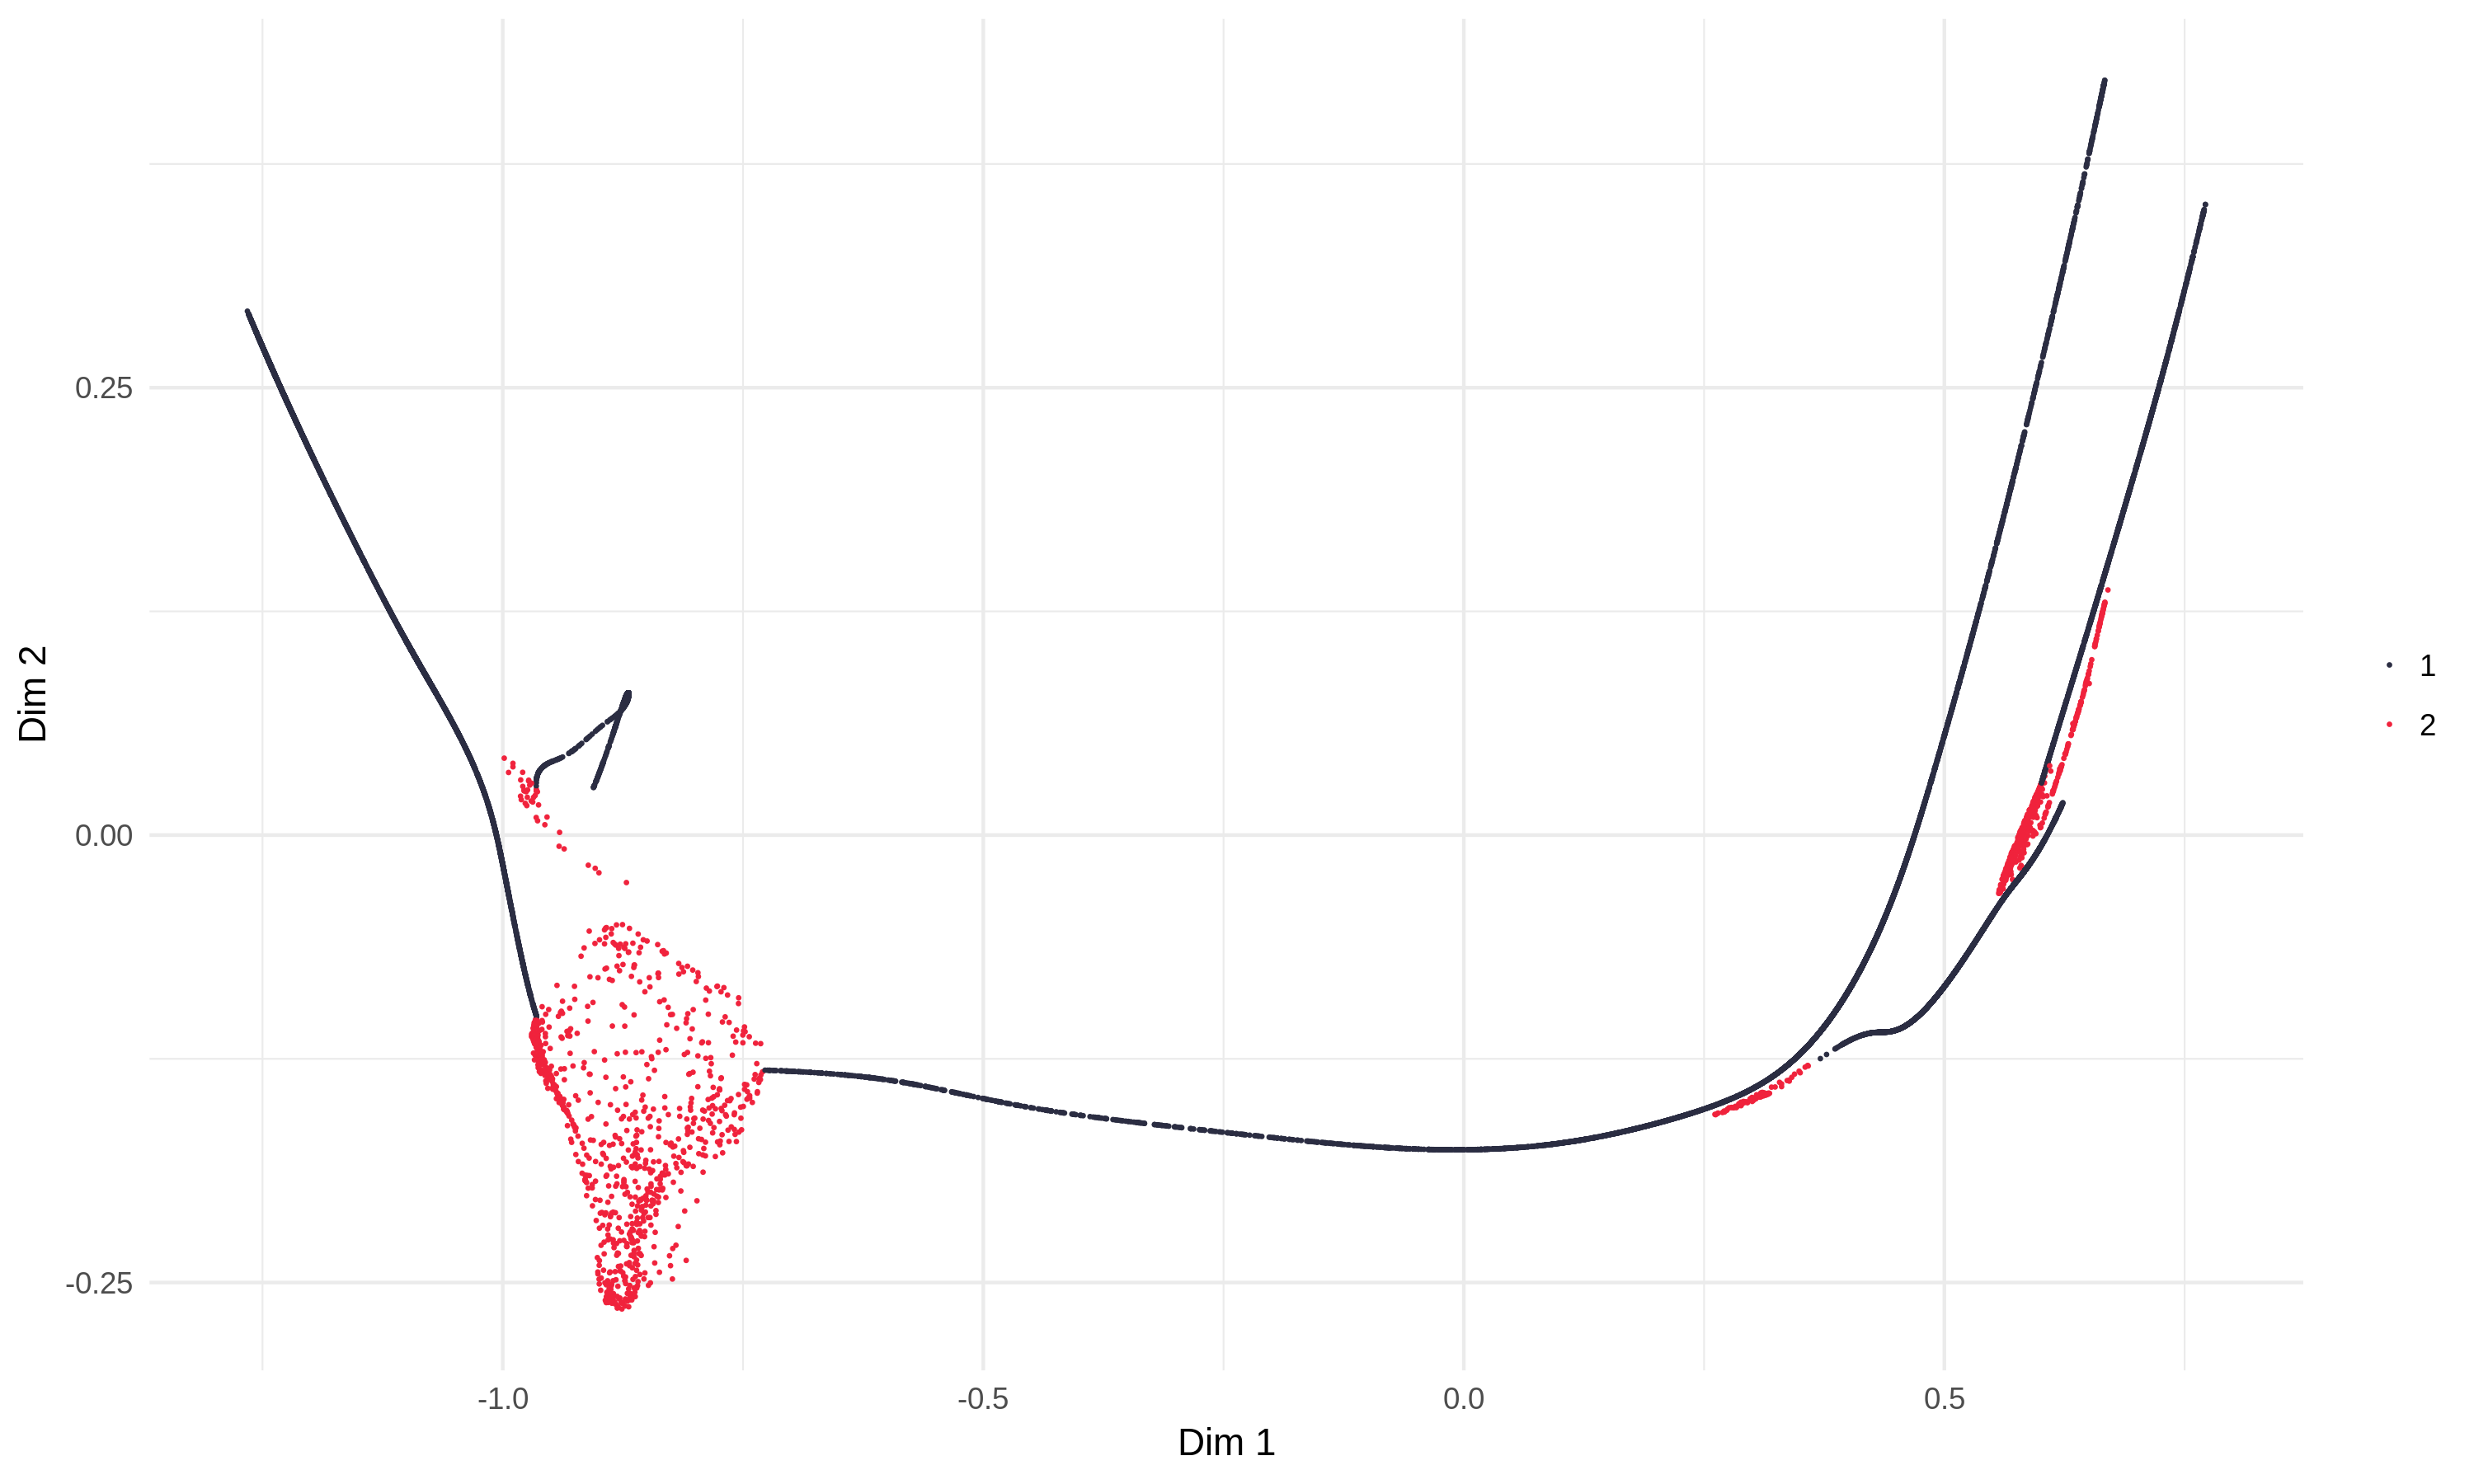

In [2]:
#adaptive dimensionality density ridge estimation
ggplot()+geom_point(aes(x=-t$`0`, y=t$`1`,color=factor(t$ridge_dims)),size=I(0.1),alpha=I(0.99))+theme_minimal()+scale_color_manual(values=c('#2B2D42','#EF233C'))+xlab('Dim 1')+ylab('Dim 2')+ theme(legend.title = element_blank())
ggsave('./figures/trajectory.hippocampus.adaptive.pdf',width = 10,height = 6)


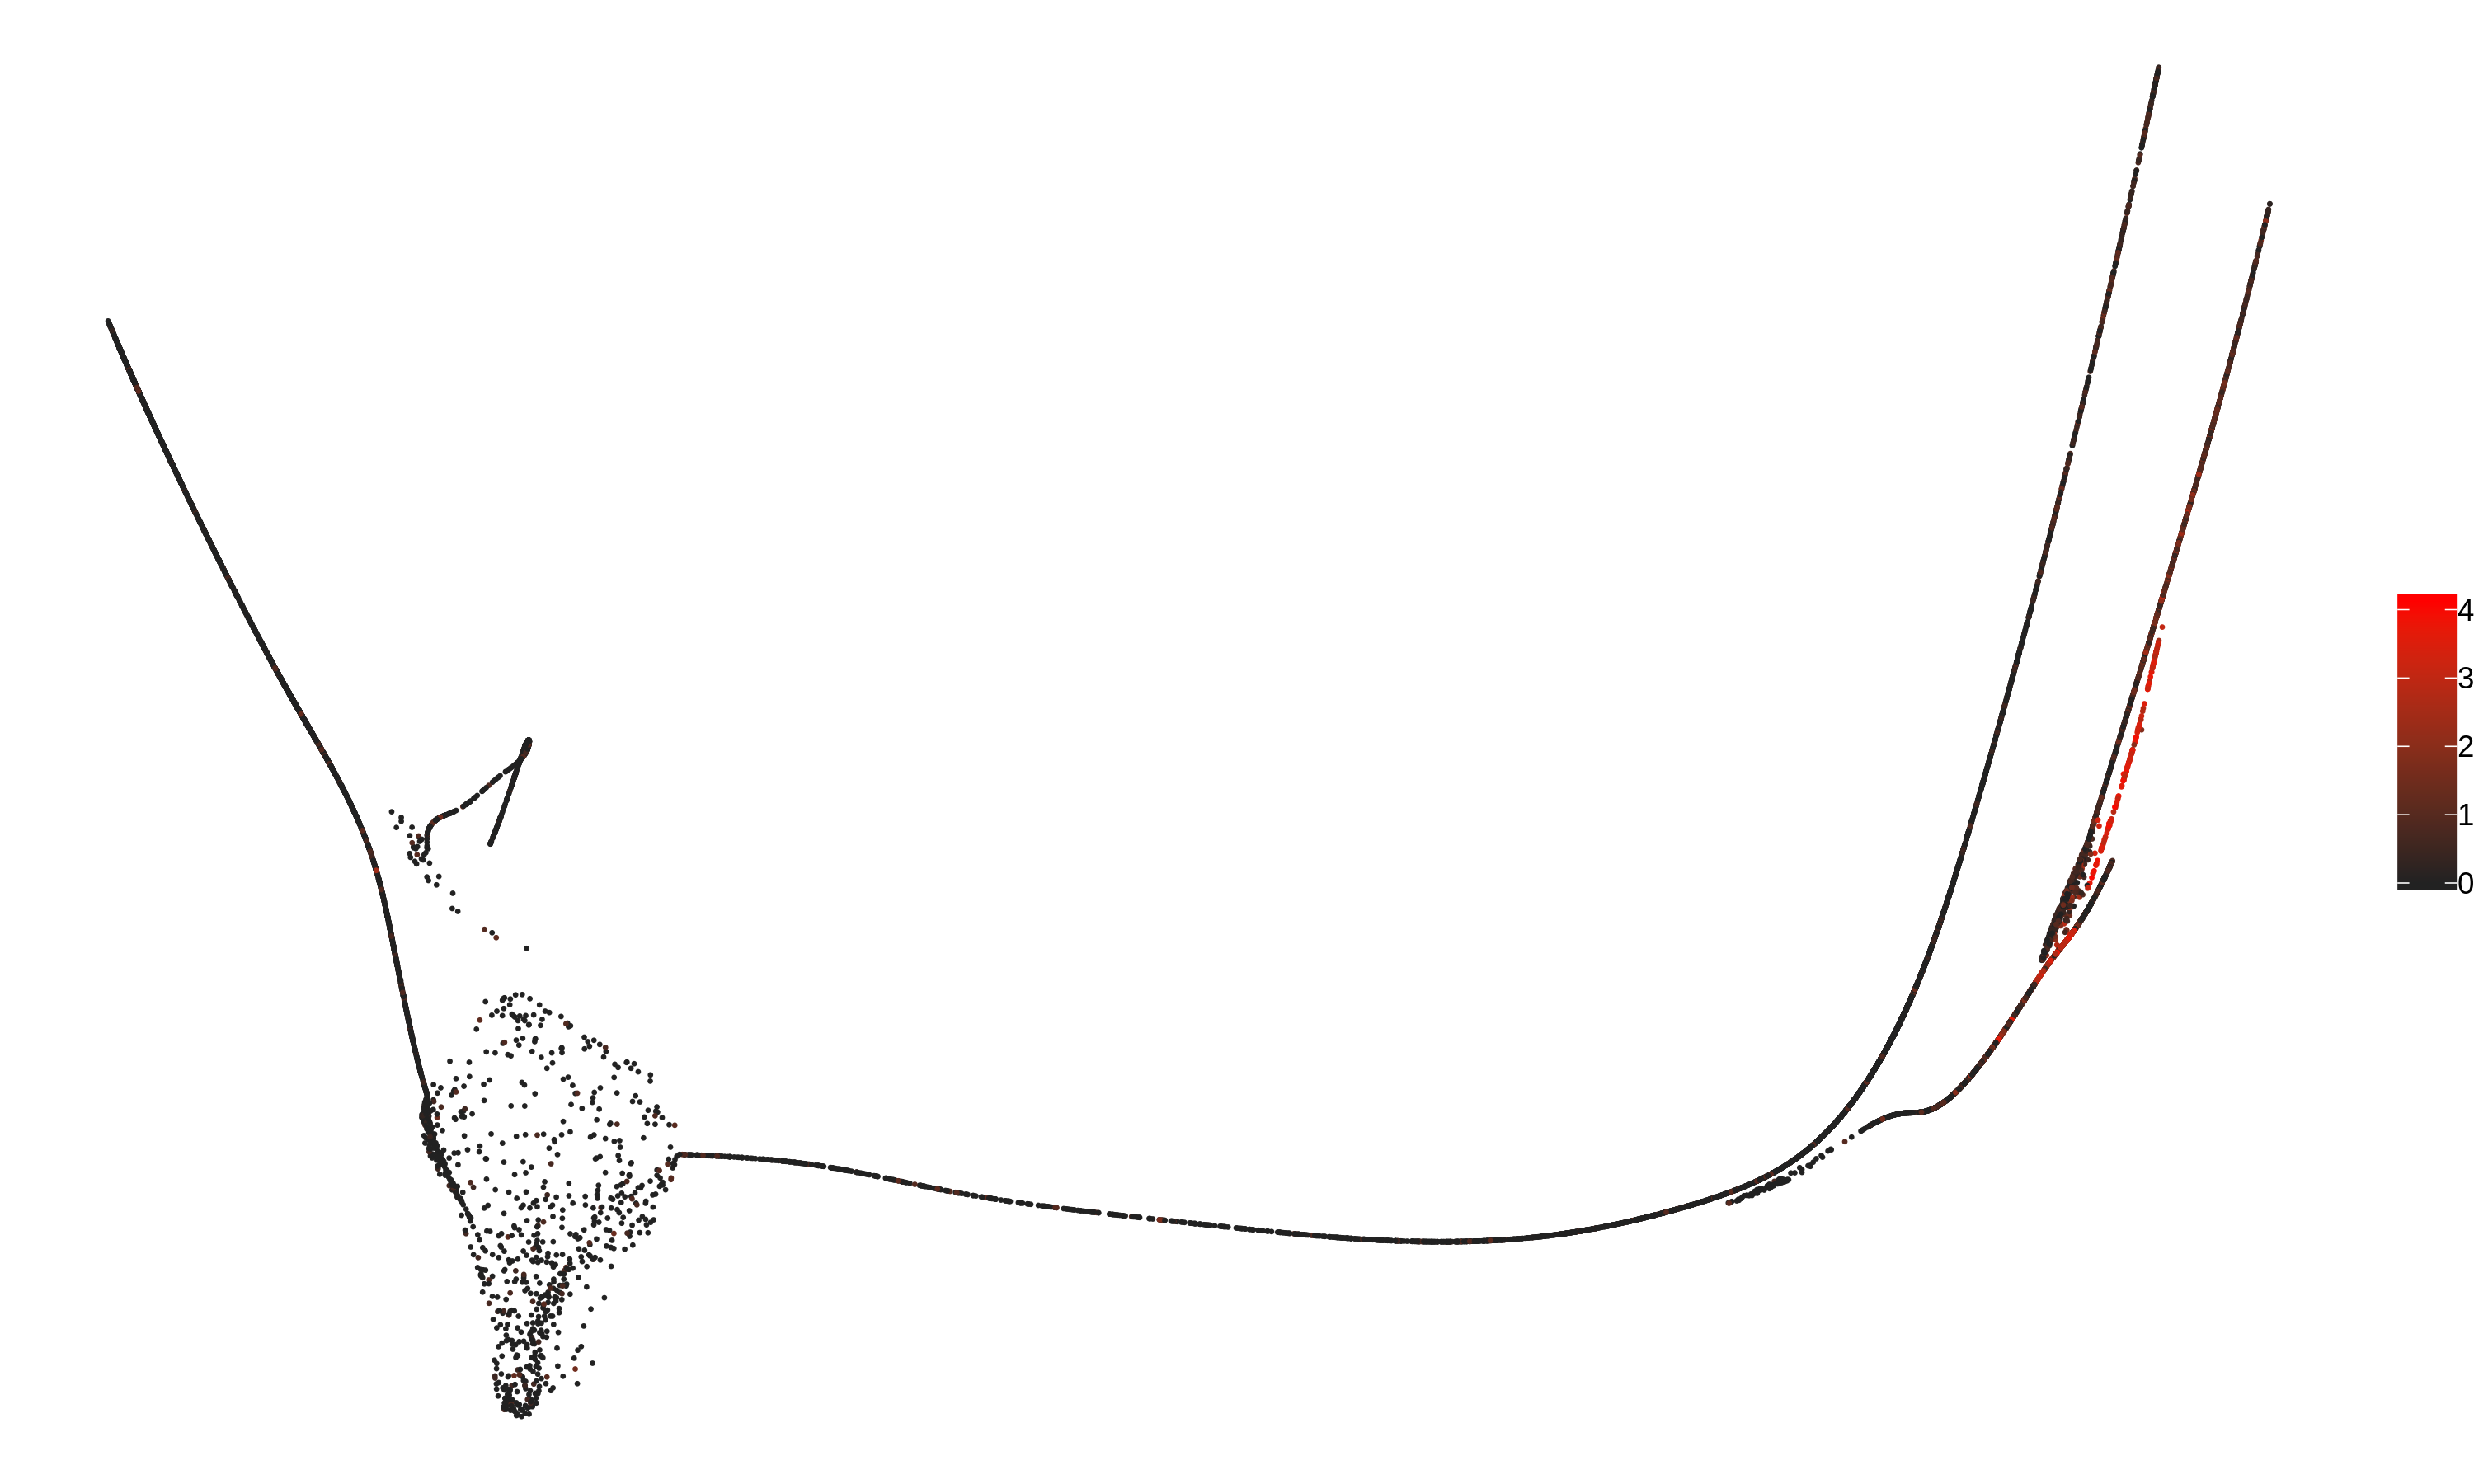

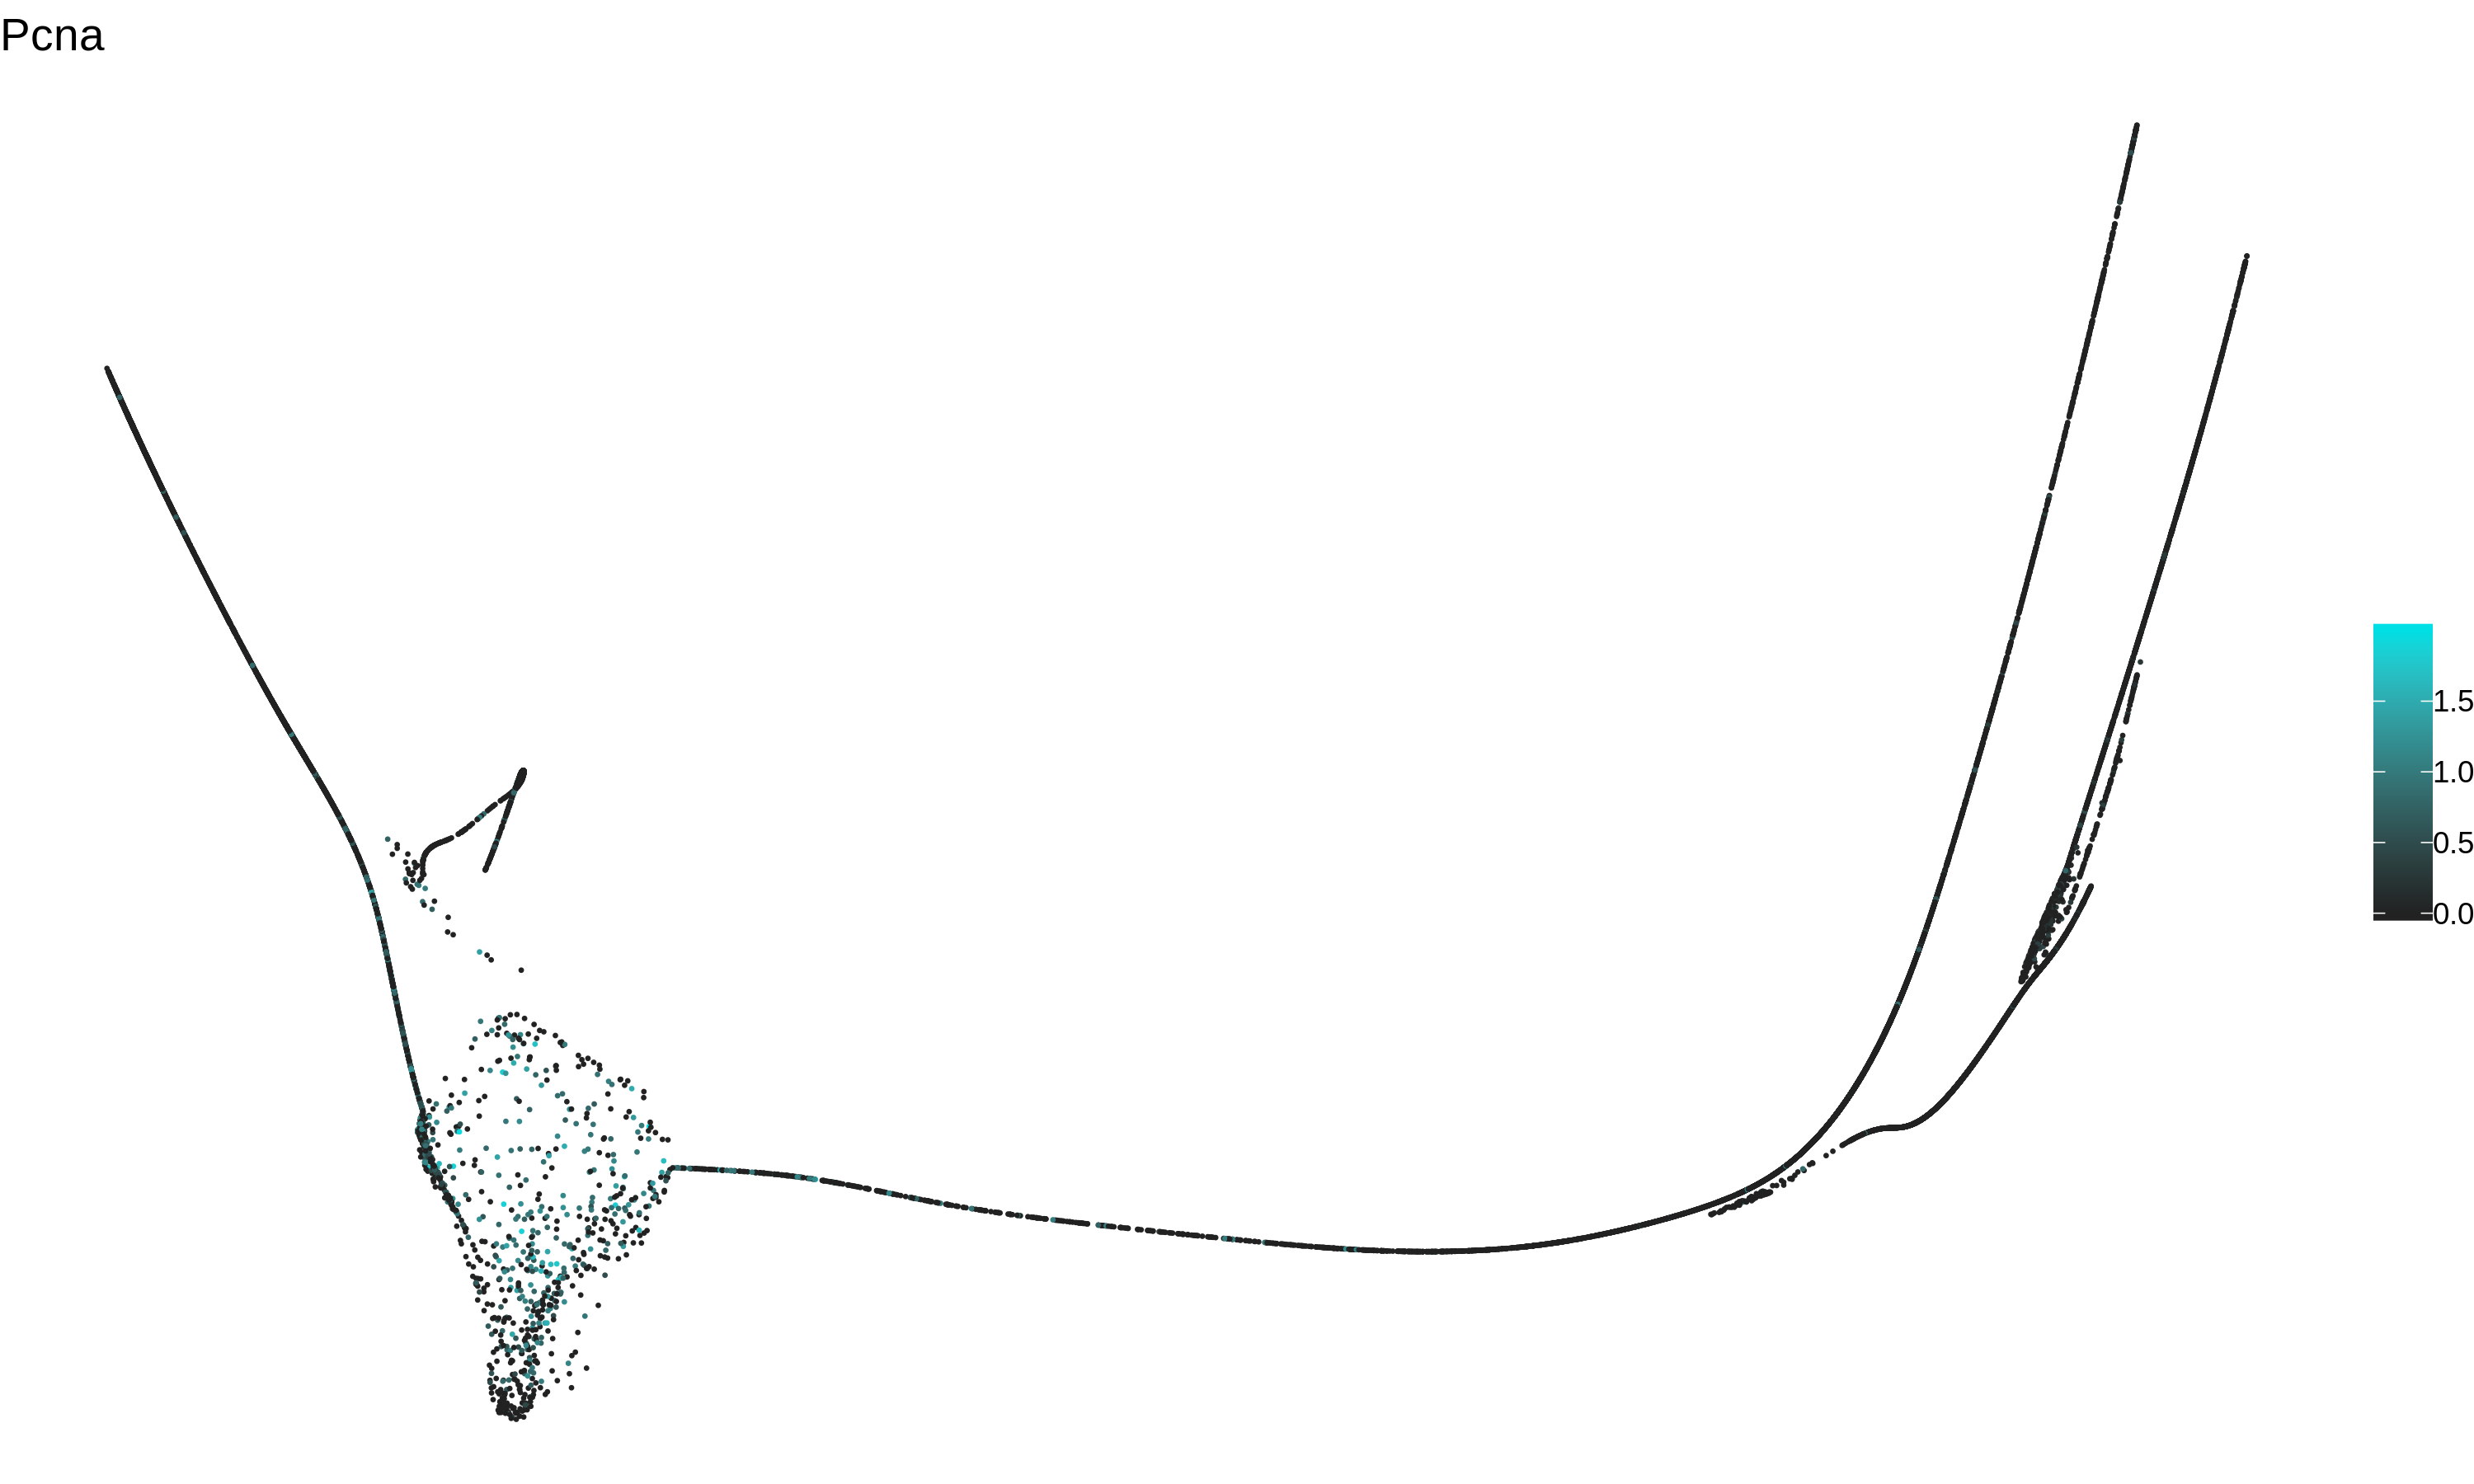

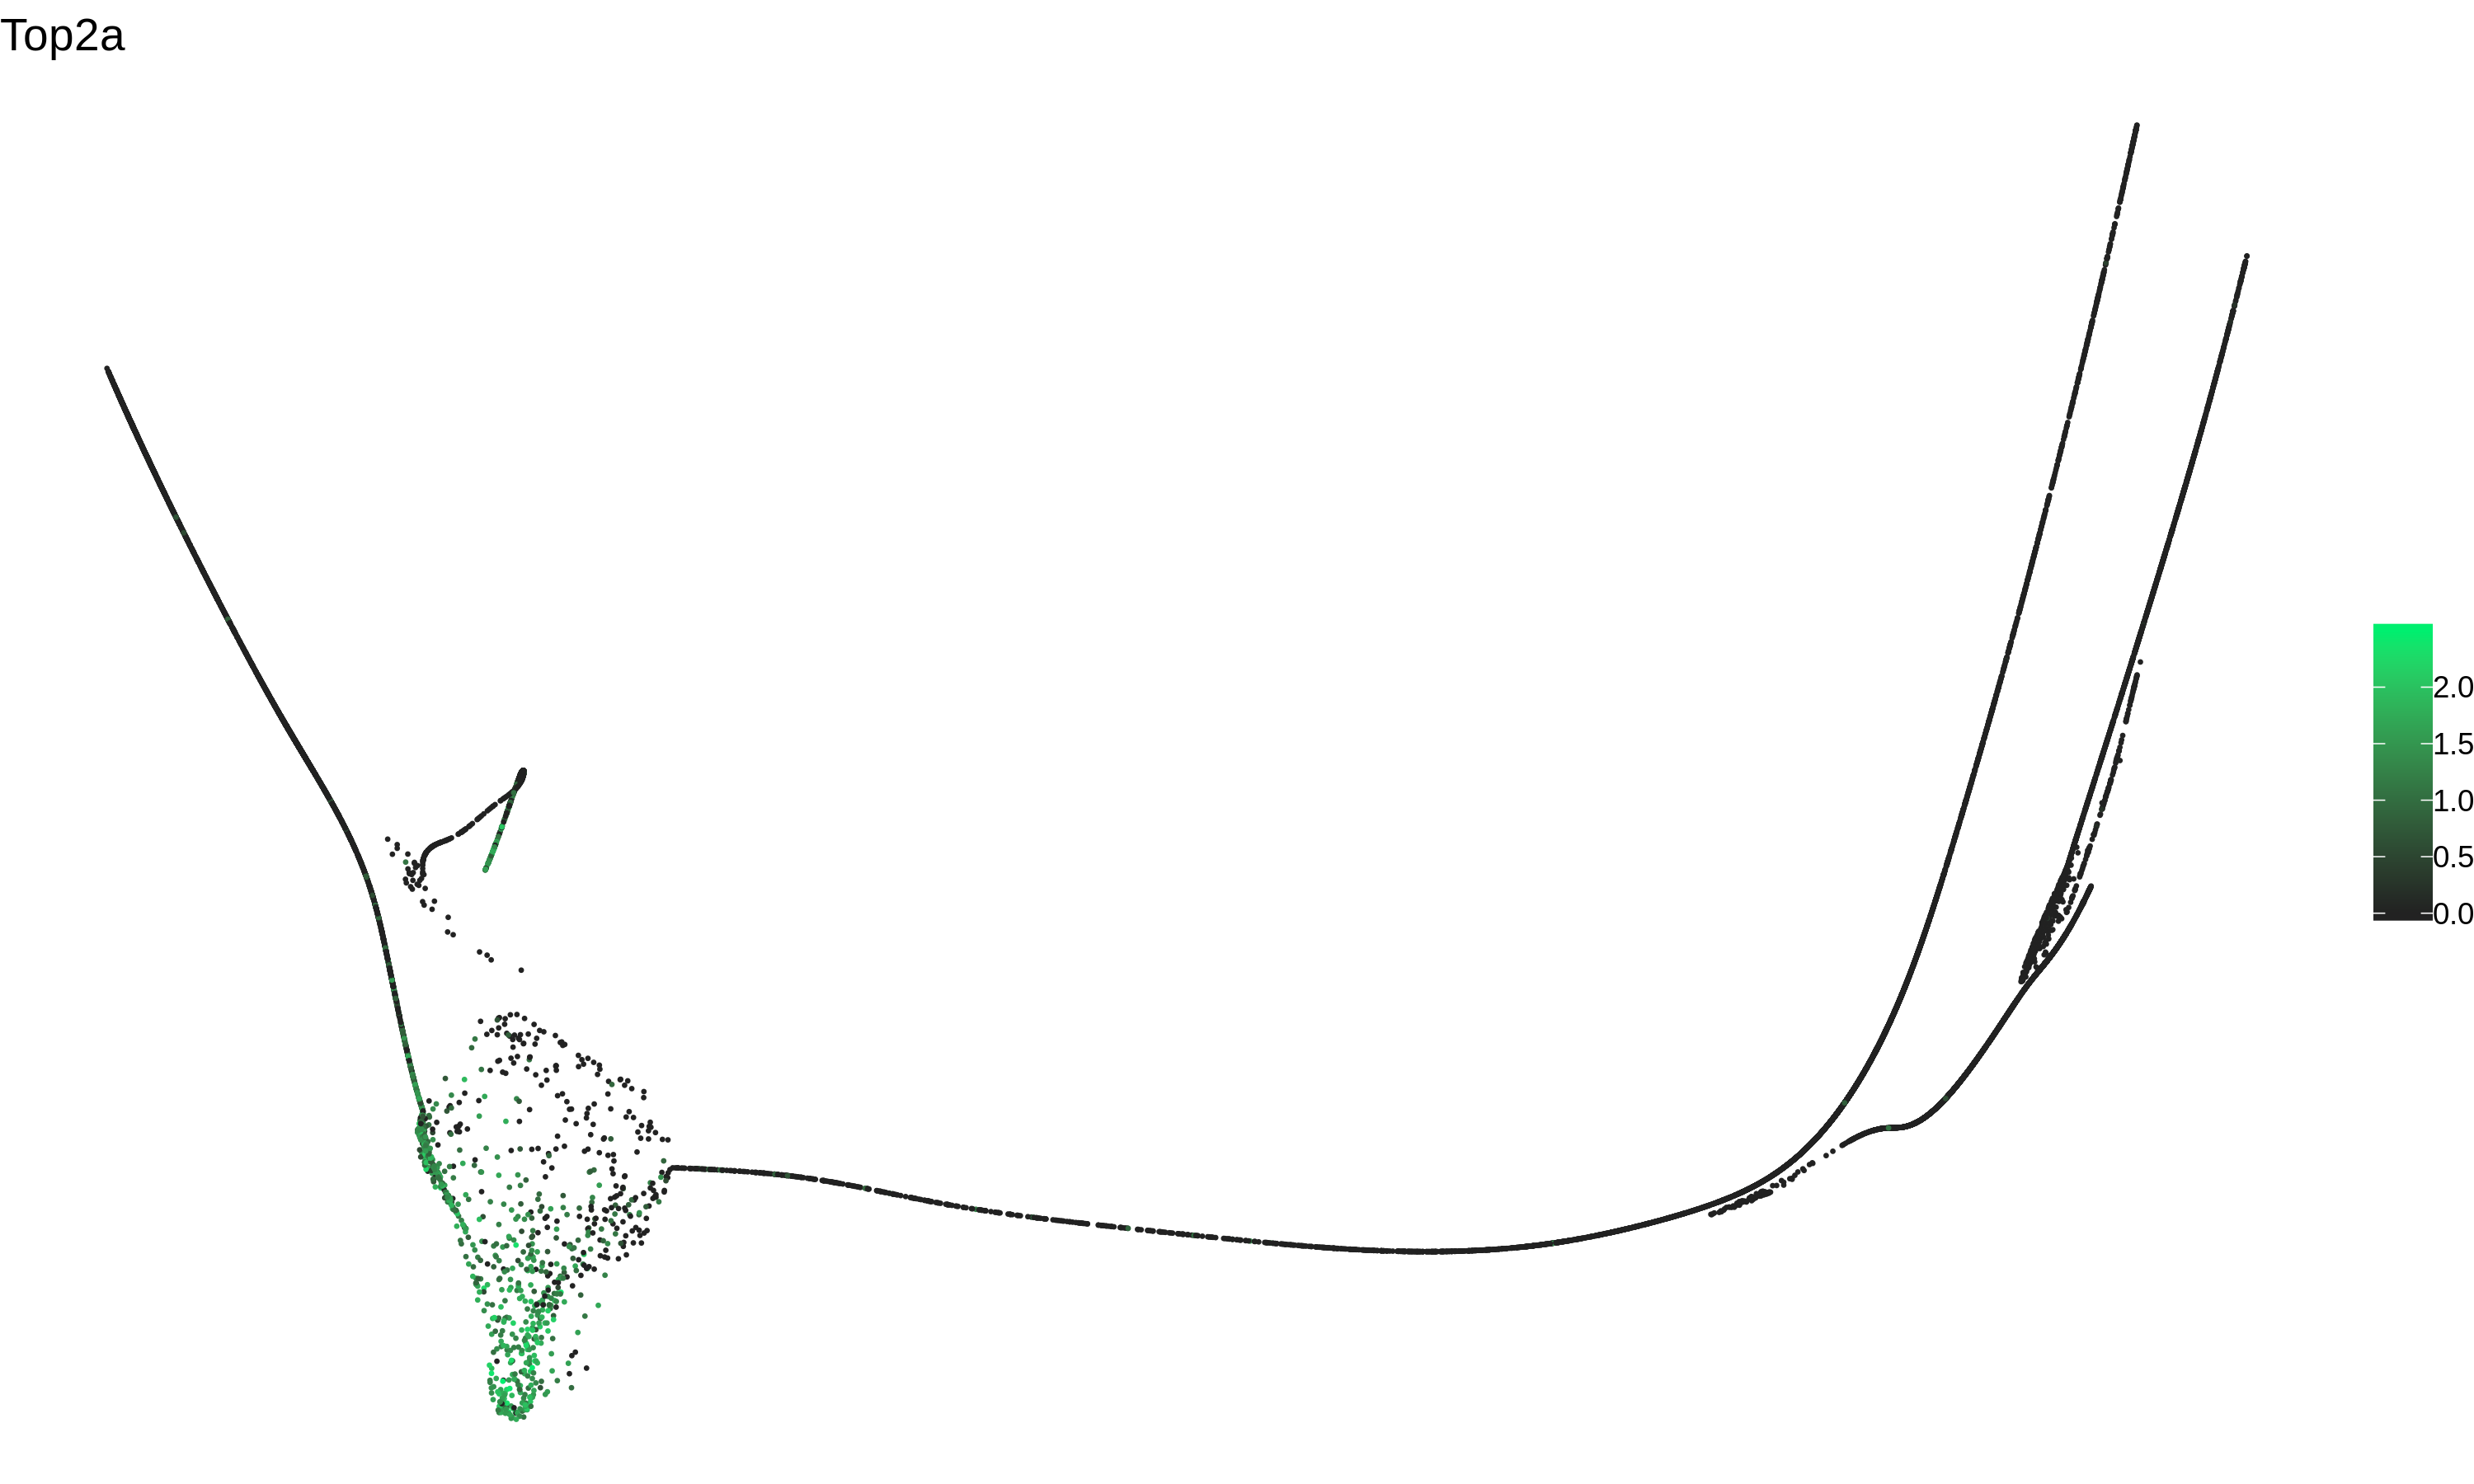

In [3]:
#plot gene expression
data = fread('./data/other/hochgerner_2018.data.gz', sep='\t')

#Cck
ggplot()+geom_point(aes(x=-t$`0`, y=t$`1`,color=log(1+as.numeric(data[match('Cck',data$V1),2:dim(data)[2]]))),size=I(0.1),alpha=I(0.99))+theme_minimal()+xlab('Dim 1')+ylab('Dim 2')+scale_color_gradient(low="#222222",high="#FF0000")+ theme_void() + theme(legend.title = element_blank())
ggsave('./figures/trajectory.hippocampus.adaptive.cck.pdf',width = 10,height = 6)

#Pcna
ggplot()+geom_point(aes(x=-t$`0`, y=t$`1`,color=log(1+as.numeric(data[match('Pcna',data$V1),2:dim(data)[2]]))),size=I(0.1),alpha=I(0.99))+theme_minimal()+xlab('Dim 1')+ylab('Dim 2')+scale_color_gradient(low="#222222",high="#00DFE4")+ theme_void()+ theme(legend.title = element_blank())+ggtitle('Pcna')
ggsave('./figures/trajectory.hippocampus.adaptive.pcna.pdf',width = 10,height = 6)

#Top2a
ggplot()+geom_point(aes(x=-t$`0`, y=t$`1`,color=log(1+as.numeric(data[match('Top2a',data$V1),2:dim(data)[2]]))),size=I(0.1),alpha=I(0.99))+theme_minimal()+xlab('Dim 1')+ylab('Dim 2')+scale_color_gradient(low="#222222",high="#00EF6F")+ theme_void() + theme(legend.title = element_blank())+ggtitle('Top2a')
ggsave('./figures/trajectory.hippocampus.adaptive.top2a.pdf',width = 10,height = 6)

